In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv")

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [10]:
motores = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [13]:
motores_treino, motores_test, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


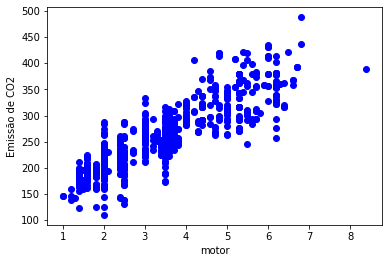

In [15]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel('motor')
plt.ylabel('Emissão de CO2')
plt.show()

In [17]:
# Modelo do tipo de Regressão Linear

modelo_linear = linear_model.LinearRegression()

#Modelo usando dataser de teste, para encontrar o valor de A e B da expressção (y = a + b.x)

modelo_linear.fit(motores_treino, co2_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [19]:
print('(A) Intercepto: ', modelo_linear.intercept_)
print('(B) Inclinação: ', modelo_linear.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


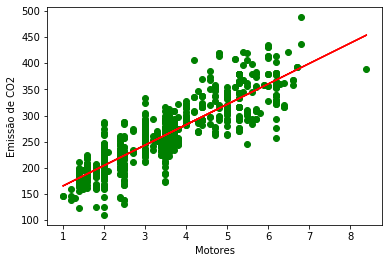

In [20]:
plt.scatter(motores_treino, co2_treino, color='green')
plt.plot(motores_treino, modelo_linear.coef_[0][0] * motores_treino + modelo_linear.intercept_[0], 'r')
plt.ylabel('Emissão de CO2')
plt.xlabel('Motores')
plt.show()

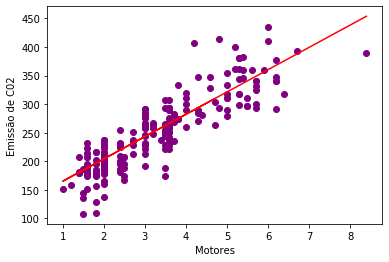

In [24]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = modelo_linear.predict(motores_test)

plt.scatter(motores_test, co2_teste, color='purple')
plt.plot(motores_test, modelo_linear.coef_[0][0]*motores_test + modelo_linear.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

In [25]:
#Agora é mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )


Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
